In [3]:
#HIDDEN

# NOTE: If you are viewing this as a jupyter notebook, a formatted project website
# for this study can be accessed at: 

# https://kingschultz21.github.io/seng474_project/report.html


# Predicting Vehicle MSRP using Multiple Regression Analysis
#### By: Connor Schultz and Aiden Bull

### 1. Introduction
<p style="line-height: 2;">
Predictive analytics is an important branch of statistics and data mining that is used to predict outcomes of future unknown events. When applied to price prediction, predictive analytics can heavily benefit both the consumers and manufacturers of products. Consumers benefit by ensuring that they are getting the best deal for a given product, and manufacturers benefit by ensuring that the determined MSRP of a given product accurately reflects the market value of similar products. Since cars are generally quite expensive, predictive analytics is particularly useful to aid in the decision making of both the consumers and the manufacturers. This study aims at using data preprocessing, encoding, attribute engineering and multiple regression to accurately predict the MSRP of new vehicles from the specifications of a particular vehicles. Various methods were tested to attempt to improve accuracy and reduce computation complexity.
</p>


### 2. Data
<p style="line-height: 2;">
The dataset used for our regression analysis was gathered from a reddit post from the r/datasets subreddit [1]. The dataset was posted on March 28th, 2019, by user u/nicolas-gervais. The dataset contains 32,316 instances of cars, and was gathered using Python libraries from The Car Connection’s website [2]. The dataset also contains 235 car specifications, which when paired with the large number of instances, made this dataset suitable for a multiple regression analysis.
</p>

### 3. Analysis Methods
<p style="line-height: 2;">
The aim of our regression analysis was predicting the MSRP values of car instances based on their specifications. Before regression could be performed, the initial dataset required heavy preprocessing. Once the dataset was processed,the data was split into training and test sets. We then built regression models on the training sets using three types of regression: linear regression using least squares, ridge regression, and lasso regression. Afterwards, we used the models to iterate through the test set and predict each of the test instances’ MSRP values. Finally, we stored error values for each prediction.
</p>

#### 3.1. Data Preprocessing
<p style="line-height: 2;">
The data required heavy preprocessing before it could be used for our purposes. First, many instances were missing data on certain attributes. The regression methods used required numeric values for all attributes, and so we had to decide on a method of fixing this. Another issue with the dataset was that many of the attributes were quite obscure and had large ranges of possible values, with low frequencies for each value. Attributes such as these are not ideal for building a regression model that provided accurate predictions. As it turns out, the obscure attributes often had a large number of missing values for the given car instances. This correlation was used to solve both of these issues. The final issue with the dataset was that many of the attributes were not numeric, but were rather categorical and stored using text. The major issue with these categorical attributes was that the categories did not follow strict naming conventions. There were many categorical values that were stored using different names, but had identical semantics. One example of this would be the values <em>4wd</em>, <em>four-wheel-drive</em>, <em>4 wheel drive</em>, and <em>Four-wd</em> belonging to the <strong>Drivetrain</strong> attribute. Each of these categorical values refer to the same drivetrain, but are recognized differently because they have different representations. Fixing these types of issues, then encoding them to numeric attributes contributed to the bulk of the time spent preprocessing.
</p>

<p style="line-height: 2;">
To fix the issue of missing attributes, we had a choice between solutions. One solution was to assign values based on a set of rules, such as assigning each value to 0, or assigning each value to the mean of the given attribute. This solution would fix the problem of missing values, but would add incorrect information to the dataset. For a given car instance with a missing attribute value, it is possible that the correct value for that attribute exists, in which case assigning a value of 0 would be removing value from the car. Similarly replacing the missing attribute value with the mean of the attribute would be unlikely to match the true value exactly, and in the case that the attribute value is low frequency and obscure, it could add value to cars that should not receive it. Another solution to the missing attribute problem is to just remove the missing instances or attributes entirely. The issue with this method is that it reduces the size and information richness of the dataset. However, as mentioned earlier, it was noticed that a lot of the obscure attribute types were often the ones that had instances with missing values. Because of this, the attributes that were deemed too obscure and not valuable a priori were removed. This fixed the missing attribute problem, while also fixing the issue of having obscure attributes that did not contribute to the analysis. Afterwards, any remaining instances with missing attribute values were removed, which reduced our dataset size to 23,844 but fixed the missing attribute problem.
</p>

<p style="line-height: 2;">
Furthermore, in order to aggregate the low frequency attribute values, values that were equivalent but encoded differently were combined to a single value using regular expressions and replace functions. For example, in the <strong>Engine Type</strong> attribute, the values <em>gasv6</em> and <em>regularunleadedv6</em> were aggregated together as <em>gasv6</em>.
</p>

<p style="line-height: 2;">
After the data was aggregated the categorical attributes were encoded as numeric values. To accomplish this a one-hot encoding scheme was applied to the categorical attributes. For example, if a categorical attribute contained four distinct values, the encoder would create four new binary attributes, one for each value where only one bit would be set for any of the four attributes. One encoded numeric attribute from each categorical attribute was then removed, reducing the number of encoded attributes for each categorical attribute from <em>n</em> to <em>n-1</em> where <em>n</em> is the number of distinct values in the categorical attribute. This approach was chosen to combat the collinearity issue that exists when encoding categorical variables using a one-hot encoding method. The limitation with this approach is that it greatly increased the number of attributes of the dataset from 34 selected attributes to 1,756 attributes after encoding. To try and combat this, another data set that would be tested on was created without encoding certain attributes and instead decomposing them into numeric attributes. The two greatest contributors to the increased number of attributes were the <strong>Engine Type</strong> and <strong>Transmission</strong> attributes. First, the <strong>Engine Type</strong> attribute was converted to a numeric attribute representing the number of cylinders in car engine. For example, the value <em>gasv6</em> would be converted to 6. Next, the <strong>Transmission</strong> attribute was decomposed into two binary attributes representing if the car was a manual or automatic transmission and one numeric attribute representing the number of gears. For example, <em>6speedmanual</em> would be converted to a 6 in the number of gears attribute, a 1 in the manual transmission attribute and 0 in the automatic transmission attribute. The same one-hot encoding method described above was then applied to the decomposed attributes. This greatly reduced the number of attributes when compared to the fully encoded dataset, with the final number of attributes in the semi-encoded dataset being 64.
</p>

<p style="line-height: 2;">
All data processing was performed by the <code>data_cleaner.py</code> python program which can be found in the project repository linked at the bottom of the study.
</p>

In [16]:
#HIDDEN
#Centers code cell outputs
from IPython.display import display, HTML
CSS = """
.output {
    align-items: center;
}
"""
HTML('<style>{}</style>'.format(CSS))

In [17]:
#HIDDEN
#Import required python3 packages
import os
import numpy as np
import pandas as pd
import nbinteract as nbi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [18]:
#Read data in from processed .csv file
#Fully Encoded data: processed using data_cleaner_fe.py
cwd = os.getcwd()
data_fe = pd.read_csv(cwd+"/car_data/fe_cars.csv")
data_fe = data_fe.drop(columns = ['Unnamed: 0'])
#Semi-Encoded data: processed using data_cleaner_se.py
data_se = pd.read_csv(cwd+"/car_data/se_cars.csv")
data_se = data_se.drop(columns = ['Unnamed: 0'])

data = [data_fe, data_se]

print("Fully Encoded Dataframe Dimensions: %s" % str(data_fe.shape))
print("Semi-Encoded Dataframe Dimensions: %s" % str(data_se.shape))

Fully Encoded Dataframe Dimensions: (23844, 1756)
Semi-Encoded Dataframe Dimensions: (12873, 64)


In [20]:
#Prepare data for regression analysis
Y_fe, Y_se = data_fe['MSRP'], data_se['MSRP'] #Y_fe is fully encoded target, Y_se is semi-encoded target

X_fe, X_se = data_fe.drop(columns = ['MSRP']), data_se.drop(columns = ['MSRP']) #X_fe is fully encoded attributes, X_se is semi-encoded attributes

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, Y_fe, test_size = 0.25)
X_train_se, X_test_se, y_train_se, y_test_se = train_test_split(X_se, Y_se, test_size = 0.25)

X_train, X_test = [X_train_fe, X_train_se], [X_test_fe, X_test_se]
y_train, y_test = [y_train_fe, y_train_se], [y_test_fe, y_test_se]

#### 3.2. Least Squares Linear Regression
<p style="line-height: 2;">
For our first regression model, we used the <code>LinearRegression.fit()</code> function from the scikit-learn python library. This function takes a set of independent prediction vectors X and a set of values to predict Y. Using X and Y,it builds a regression model using ordinary least squares (OLS) linear regression. This regression model finds a best fitting line by determining the b coefficients of y = b<sub>0</sub>+b<sub>1</sub>x1+b<sub>2</sub>x2+...+b<sub>n</sub>xn or yi=X<sub>i</sub>Ꞵ where i represents some particular observation instance. It does this by finding values for Ꞵ that minimizes a cost function.
</p>



In [21]:
#Model Fitting
lin = [LinearRegression().fit(X_train[0], y_train[0]), LinearRegression().fit(X_train[1], y_train[1])]
#Prediction
pred_lin = [lin[0].predict(X_test[0]), lin[1].predict(X_test[1])] 
#Metrics
mae_lin = [mean_absolute_error(y_test[0], pred_lin[0]), mean_absolute_error(y_test[1], pred_lin[1])]
rmse_lin = [np.sqrt(mean_squared_error(y_test[0], pred_lin[0])), np.sqrt(mean_squared_error(y_test[1], pred_lin[1]))]
r2_lin = [r2_score(y_test[0], pred_lin[0]), r2_score(y_test[1], pred_lin[1])]

#### 3.3. Ridge Regression
<p style="line-height: 2;">
The second regression model we used was ridge regression. To build the model, we used the <code>Ridge.fit()</code> function from the scikit-learn python library. Ridge regression works similarly to ordinary least squares but it adds a bias value to the cost function, which helps to control variance. This helps with issues of overfitting and high multicollinearity.
</p>


In [22]:
#Model Fitting
#alpha = 0.1 found by GridSearchCV
ridge = [Ridge(alpha = 0.1).fit(X_train[0], y_train[0]), Ridge(alpha = 0.1).fit(X_train[1], y_train[1])]
#Prediction
pred_ridge = [ridge[0].predict(X_test[0]), ridge[1].predict(X_test[1])] 
#Metrics
mae_ridge = [mean_absolute_error(y_test[0], pred_ridge[0]), mean_absolute_error(y_test[1], pred_ridge[1])]
rmse_ridge = [np.sqrt(mean_squared_error(y_test[0], pred_ridge[0])), np.sqrt(mean_squared_error(y_test[1], pred_ridge[1]))]
r2_ridge = [r2_score(y_test[0], pred_ridge[0]), r2_score(y_test[1], pred_ridge[1])]

#### 3.4. Lasso Regression
<p style="line-height: 2;">
The last regression model we used was lasso regression. This model was built with the <code>Lasso.fit()</code> function from scikit-learn. Lasso is very similar to ridge regression, but it calculates the bias in a slightly different way. Lasso regression also has the effect of often causing b coefficients to become reduced to 0, which simplifies the model.
</p>


In [27]:
#Model Fitting
#alpha = 0.1 found by GridSearchCV
lasso = [Lasso(alpha=0.1, tol = 0.1).fit(X_train[0], y_train[0]), Lasso(alpha=0.1, tol = 0.5).fit(X_train[1], y_train[1])]
#Prediction
pred_lasso = [lasso[0].predict(X_test[0]), lasso[1].predict(X_test[1])] 
#Metrics
mae_lasso = [mean_absolute_error(y_test[0], pred_lasso[0]), mean_absolute_error(y_test[1], pred_lasso[1])]
rmse_lasso = [np.sqrt(mean_squared_error(y_test[0], pred_lasso[0])), np.sqrt(mean_squared_error(y_test[1], pred_lasso[1]))]
r2_lasso = [r2_score(y_test[0], pred_lasso[0]), r2_score(y_test[1], pred_lasso[1])]

### 4. Results and Discussion
<p style="line-height: 2;">
A histogram below shows the distribution of MSRP values in the fully encoded dataset. The mean MSRP of this dataset is \$38,541. The semi-encoded dataset had a very similar distribution and mean MSRP of \$33,535. The discrepancy is caused by the number of instances in each dataset, which varys slightly.
</p>

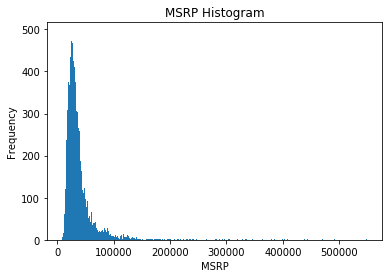

In [24]:
#HIDDEN
plt.hist(Y_fe,bins = 1000)
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title('MSRP Histogram');

#### 4.1. Error Calculations
<p style="line-height: 2;">
In order to gauge our accuracy, we predicted the values of each test instance using the regression models and stored the error values. We then used the error values to calculate the mean squared error and mean absolute error. The table belows shows the 3 regression models performance on both the fully and semi-encoded datasets.
</p>

In [28]:
#HIDDEN
data = [["Linear Regression", "Fully Encoded", data_fe.shape, mae_lin[0], rmse_lin[0], r2_lin[0]],
        ["Linear Regression", "Semi-Encoded", data_se.shape, mae_lin[1], rmse_lin[1], r2_lin[1]],                                                                                         ["Ridge Regression", "Fully Encoded", data_fe.shape, mae_ridge[0], rmse_ridge[0], r2_ridge[0]],
        ["Ridge Regression", "Semi-Encoded", data_se.shape, mae_ridge[1], rmse_ridge[1], r2_ridge[1]],
        ["Lasso Regression", "Fully Encoded", data_fe.shape, mae_lasso[0], rmse_lasso[0], r2_lasso[0]],
        ["Lasso Regression", "Semi-Encoded", data_se.shape, mae_lasso[1], rmse_lasso[1], r2_lasso[1]]]                                                                                                                                                                               
columns = ["Model", "Dataset", "Dataframe Dimensions", "Mean Absolute Error", "Root Mean Square Error", "R^2 value"]
pd.DataFrame(data, columns=columns)

Model        Dataset Dataframe Dimensions  Mean Absolute Error  \
0  Linear Regression  Fully Encoded        (23844, 1756)          4235.279455   
1  Linear Regression   Semi-Encoded          (12873, 64)          7086.170215   
2   Ridge Regression  Fully Encoded        (23844, 1756)          4268.631048   
3   Ridge Regression   Semi-Encoded          (12873, 64)          7098.145156   
4   Lasso Regression  Fully Encoded        (23844, 1756)          4970.594364   
5   Lasso Regression   Semi-Encoded          (12873, 64)          7943.363748   

   Root Mean Square Error  R^2 value  
0             9554.845289   0.923550  
1            14460.806607   0.760401  
2             9512.065618   0.924233  
3            14464.153036   0.760290  
4            10817.683799   0.902006  
5            15007.747809   0.741934

#### 4.2. Regression Results
<p style="line-height: 2;">
The following is the results for our ordinary least squares regression analysis, our ridge regression analysis, and our lasso regression analysis. For each type of regression, we will include a plot of the outcomes, as well as the error values of that regression’s predictions on our test sets. 
</p>

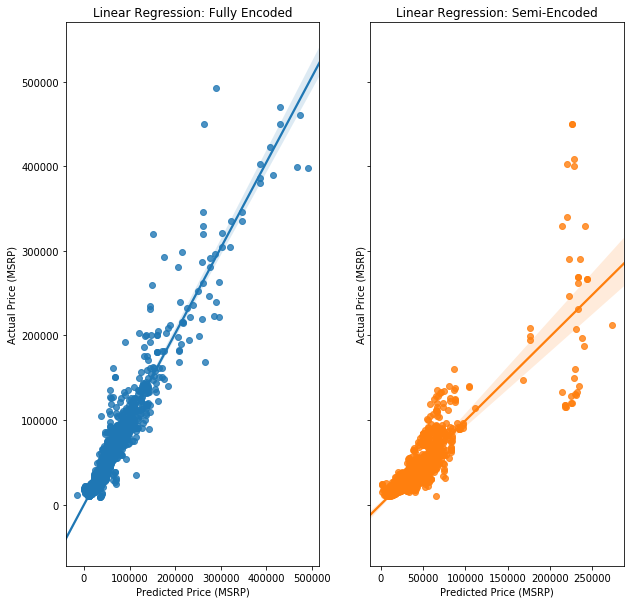

In [34]:
#HIDDEN
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10), sharey=True)
sns.regplot(lin[0].predict(X_test[0]), y_test[0], ax = axes[0])
sns.regplot(lin[1].predict(X_test[1]), y_test[1], ax = axes[1])
axes[0].set_title('Linear Regression: Fully Encoded'), axes[1].set_title('Linear Regression: Semi-Encoded')
axes[0].set_xlabel("Predicted Price (MSRP)"), axes[1].set_xlabel("Predicted Price (MSRP)")
axes[0].set_ylabel("Actual Price (MSRP)"), axes[1].set_ylabel("Actual Price (MSRP)")
plt.show();

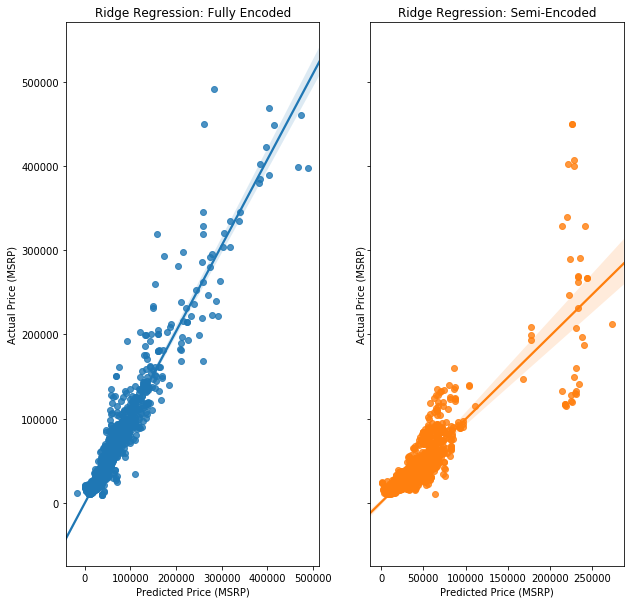

In [33]:
#HIDDEN
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10), sharey=True)
sns.regplot(ridge[0].predict(X_test[0]), y_test[0], ax = axes[0])
sns.regplot(ridge[1].predict(X_test[1]), y_test[1], ax = axes[1])
axes[0].set_title('Ridge Regression: Fully Encoded'), axes[1].set_title('Ridge Regression: Semi-Encoded')
axes[0].set_xlabel("Predicted Price (MSRP)"), axes[1].set_xlabel("Predicted Price (MSRP)")
axes[0].set_ylabel("Actual Price (MSRP)"), axes[1].set_ylabel("Actual Price (MSRP)")
plt.show();

In [32]:
#HIDDEN
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10), sharey=True)
f1 = sns.regplot(lasso[0].predict(X_test[0]), y_test[0], ax = axes[0])
f2 = sns.regplot(lasso[1].predict(X_test[1]), y_test[1], ax = axes[1])
axes[0].set_title('Lasso Regression: Fully Encoded'), axes[1].set_title('Lasso Regression: Semi-Encoded')
axes[0].set_xlabel("Predicted Price (MSRP)"), axes[1].set_xlabel("Predicted Price (MSRP)")
axes[0].set_ylabel("Actual Price (MSRP)"), axes[1].set_ylabel("Actual Price (MSRP)")
plt.show();

#### 4.3. Discussion of Accuracy and Issues Surrounding Ordinary Least Squares: Dummy trap
<p style="line-height: 2;">
The accuracy of each of our regression types ended up being fairly similar. Each of our regression models produced a root mean squared error of approximately 9\%, and similar values for mean squared error and mean absolute error.
</p>

<p style="line-height: 2;">
When we first began our regression analysis, we had an issue with our OLS regression. At first, we were seeing enormous error values in the predictions of our OLS model. When inspecting the coefficient vector of our model, we found that some of the one-hot encoded attributes had coefficient magnitudes in the billions. This was very strange when the highest prediction values of our test set was around 450,000. We searched around to try and discover the issue with our model and we started to learn about multicollinearity and the problem of the dummy variable trap.
</p>

<p style="line-height: 2;">
As we read about multicollinearity, we learned that there is a common issue in regression analysis about independent variable coefficients becoming inflated when there is a high level of correlation between them. One possible way that independent variables can be related is through what is known as the dummy variable trap. The dummy variable trap occurs when using one-hot or dummy encoding to encode categorical values for regression analysis. Specifically, it occurs when one encoded attribute is assigned to every original category. This leads to a situation where the values of attributes can be perfectly predicted by the values of others. A common example for this is encoding a <strong>gender</strong> category by using one encoded attribute for <em>male</em> and one encoded attribute for <em>female</em>. When the <em>male</em> attribute has a value of 0, it is certain that the <em>female</em> attribute must have a value of 1. In this way, the attributes are perfectly correlated. A simple solution to the dummy variable trap is to drop one of the encoded attributes, which removes this perfect correlation.
</p>

<p style="line-height: 2;">
It turns out we had fallen into the dummy variable trap with our encoding. We had included one encoded attribute for each category in our one-hot encodings. This was fixed by dropping the first attribute from each encoding, which fixed the error issue from our OLS regression model. Of interest, while OLS faced large error penalties from the dummy variable trap, our ridge and lasso models did not have similar penalties, instead showing similar error values to what they have now.
</p>

#### 4.4. Compressed Encoding and Results
<p style="line-height: 2;">
In addition to our reading about multicollinearity and the issues surrounding that, we also read about issues that arise due to having a high dimensionality for a model. We learned that too many attributes could lead to models that overfit on a dataset. Having a high number of attributes brings the risk of not having enough observations to effectively predict each attribute. This could lead to models that are overfitted: that represent a sample, but not the population.
</p>

<p style="line-height: 2;">
Our dataset when fully encoded has 1756 attributes. Most of these attributes are one-hot encoded attributes. We attempted to reduce this number by combining one-hot encoded attributes with similar seeming semantics. We noticed that nearly all of our one-hot encoded attributes were encodings from the transmission and engine columns, so we focused on them. We encoded the categories using regexes and replace statements to restrict the names of the attributes to a pattern. This compression reduced our number of attributes to 64, a huge departure from the original 1756.
</p>

<p style="line-height: 2;">
The results of regression on the new dataset were not spectacular. Our new regression models had new root mean squared errors of about 20\%, nearly double of what it initially was. Plotting the predictions of the new data against their true values showed interesting artefacts that likely contribute to this. One artefact is there is a vertical line predicting a large amount of cars to have an MSRP at around 200,000. The true value of these cars however span from roughly 90,000 to 500,000. It must have been that some of the high to very high MSRP cars must have had their transmission types or engines compressed together during the compression. Another artefact is that a large group of cars around the 60,000 MSRP prediction range were all predicted to have values lower than their true value. Predicted MSRP values between the 70,000-200,000 dollar range is also noticeably empty. This may be that transmission or engine values increase at a disproportionately high rate as they reach the expensive end, and so there become gaps between the predicted values of each category.
</p>


### 5. Conclusion
<p style="line-height: 2;">
In conclusion, this study highlights the importance of data preprocessing and encoding, and all of the issues that can arise from it. Changing the way attributes are encoded or making assumptions about the dataset can have huge impacts on the models behaviour. We were able to construct an effective model at predicting the MSRP of vehicles, and with more fine tuning such as cross-validation of hyperparameters and a more involved encoding process, improvements can certainly by made.
</p>


### 6. References
<p style="line-height: 2;">
[1] - https://www.reddit.com/r/datasets/comments/b6rcwv/i_scraped_32000_cars_including_the_price_and_115/

[2] - https://www.thecarconnection.com
</p>


### 7. Project Resources
1. Project Repository: https://github.com/kingschultz21/seng474_project

2. Project Website: https://kingschultz21.github.io/seng474_project/report.html